# Постановка задачи

Найти решение уравнения переноса:

$\\
u_t + au_x = S(x),\ где\ S(x)=P_m(x) = a_1 + a_2x + a_3x^2+...+a_mx^m \\
u(a, t) = u_0(t)=const,\ x \in {[a, b]} \\
u(x, 0) = u_1(x)=const
$

Т.к. $\lim_{t->\inf}u_t = 0$, то $\exists$ стационарное решение

Разобьём пространство и время на ячейки:

$x_i, i=1,..,N,\ x_i - x_{i-1} = h$ - шаг по пространству

$\\ t^{n+1}-t^n = \tau$ - шаг по времени

Проинтегрируем уравнение по ячейке $D =  (x_{i-0.5},t^n)->(x_{i+0.5},t^n)->(x_{i+0.5},t^{n+1})->(x_{i-0.5},t^{n+1})->(x_{i-0.5},t^n)$

Получим:$\iint\limits_{D} (u_t + au_x)\mathrm{dt}\mathrm{dx}=\tau\int\limits_{x_{i-0.5}}^{x_{i+0.5}} s(x) \mathrm{dx}$

$\iint (u_t + au_x)\mathrm{dt}\mathrm{dx}=\oint\limits_{\partial D} u\mathrm{dx} - au\mathrm{dt}\\
u_i^nh-a\tau U_{i+0.5}-u_i^{n+1}h+a\tau U_{i-0.5}=\tau\int\limits_{x_{i-0.5}}^{x_{i+0.5}} s(x)\mathrm{dx} = \tau S_i\\
u_i^{n+1} = u_i^n-a\frac\tau h\left(U_{i+0.5}-U_{i-0.5}\right) - \frac \tau h S_i
$

Встаёт вопрос, откуда брать большие величины. В явной схеме можно было бы взять значения из ячейки, левее (правее) границы, реализуя таким образом правый (левый) уголок. Т.к. схема неяная, будем брать значения на границе аппроксимируя значение в ячейке по трём точкам (значению в ячейке и двум соседним) методом наименьших квадратов:

$
U_{i+0.5} = k_i(x_{i+0.5}-x_{i})+b_i\\
k_i= \frac {u_{i+1}-u_{i-1}} {2h} \\
b_i = u_{i-1}\\
k_0 = \frac 1 h \left( -\frac 3 5 u_0 + \frac 1 5 u_1 + \frac 2 5 u_2 \right)\\
b_0 = u_0\\
k_N = \frac 1 h \left( \frac 3 5 u_N - \frac 1 5 u_{N-1} - \frac 2 5 u_{N-2}\right) \\
b_N = u_{N-2}
$


## Пример:

$
u_t + u_x = x^3\\
u_(x,0) = 2\\
u_(0,t) = 1,\ u \in [0,2]\\
Точное\ решение:\ u(x) = \frac {x^4} 4 + 1
$

Сравнение численного решения и точного:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("ans.txt", delim_whitespace=True)

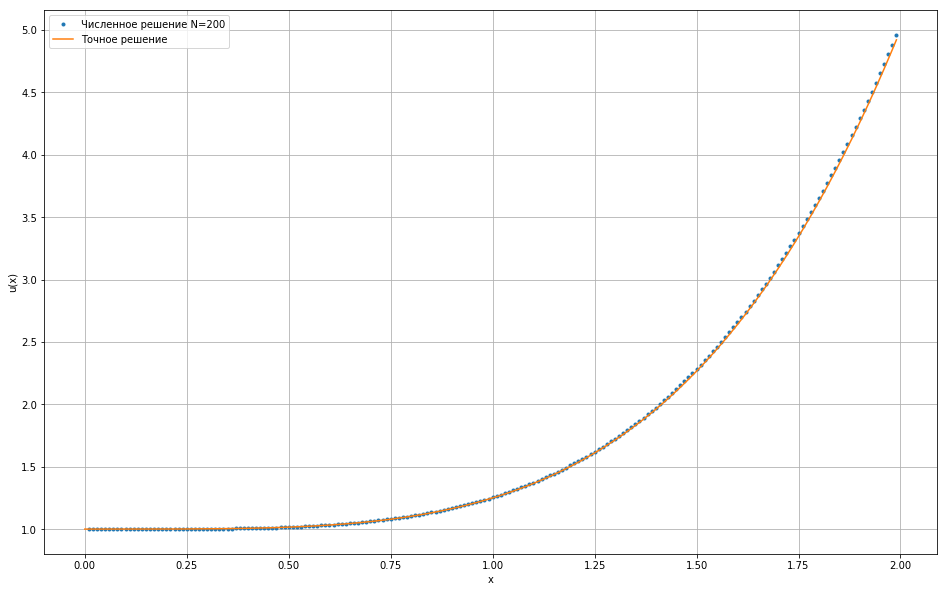

In [12]:
plt.figure(figsize = (16,10))
plt.plot(df['0'], df['1'], '.', label="Численное решение N=200")
plt.plot(np.arange(0,2,0.01), np.arange(0,2,0.01)**4/4+1, label="Точное решение")
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()